# AT Census Project, UC Berkeley- Cluster Variable Generation 

In [2]:
 # import necessary all library
import time
start = time.time()
import geopandas as gpd
import pandas as pd
from functools import reduce
import sys
'geopandas' in sys.modules
#!pip3 install matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
# Helper Function
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

In [4]:
#!pip install contextily

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Input your buffer size here in meter unit

In [6]:
# Input your buffer size here in meter unit
# 0.1 mile=160.934m
#0.25 mile=402.336 m
#0.5 mile=804.672,
#1 mile=1609.34,
#1.5 mile=2414.02,
#2 mile=3218.69

#buffer size in meter
size=804.672 

In [7]:
eco_counter=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Processed Data/Eco_combined_data_rural_vs_urban_before_QA_QC.csv')
# eco_counter=eco_counter.loc[eco_counter['latitude']!=0]
# eco_counter=eco_counter.loc[eco_counter['longitude']!=0]
eco_counter1=eco_counter.drop_duplicates(subset=['ID','latitude','longitude'])
eco_counter1=eco_counter1[['ID','latitude','longitude']]
eco_counter1 = gpd.GeoDataFrame(eco_counter1, geometry=gpd.points_from_xy(eco_counter1.longitude, eco_counter1.latitude))
eco_counter2 = eco_counter1.set_crs("EPSG:4326")
eco_counter2_proj = eco_counter2.to_crs(epsg=32610)
eco_counter2_proj.head()

,ID,latitude,longitude,geometry
0,671,37.791160,-122.459440,POINT (547594.175 4182781.782)
35064,1127,37.796165,-122.419490,POINT (551108.196 4183358.173)
70128,2415,37.774200,-122.436295,POINT (549643.359 4180912.115)
105192,2691,35.287736,-120.657826,POINT (712996.276 3907468.448)
140256,2692,35.287736,-120.657826,POINT (712996.276 3907468.448)


In [8]:
eco_counter2_proj["ID"].nunique()

416

In [9]:
gdf1 = eco_counter2_proj.copy()
gdf1['geometry'] = gdf1['geometry'].buffer(size)
gdf1.head()

,ID,latitude,longitude,geometry
0,671,37.791160,-122.459440,"POLYGON ((548398.847 4182781.782, 548394.972 4..."
35064,1127,37.796165,-122.419490,"POLYGON ((551912.868 4183358.173, 551908.993 4..."
70128,2415,37.774200,-122.436295,"POLYGON ((550448.031 4180912.115, 550444.157 4..."
105192,2691,35.287736,-120.657826,"POLYGON ((713800.948 3907468.448, 713797.074 3..."
140256,2692,35.287736,-120.657826,"POLYGON ((713800.948 3907468.448, 713797.074 3..."


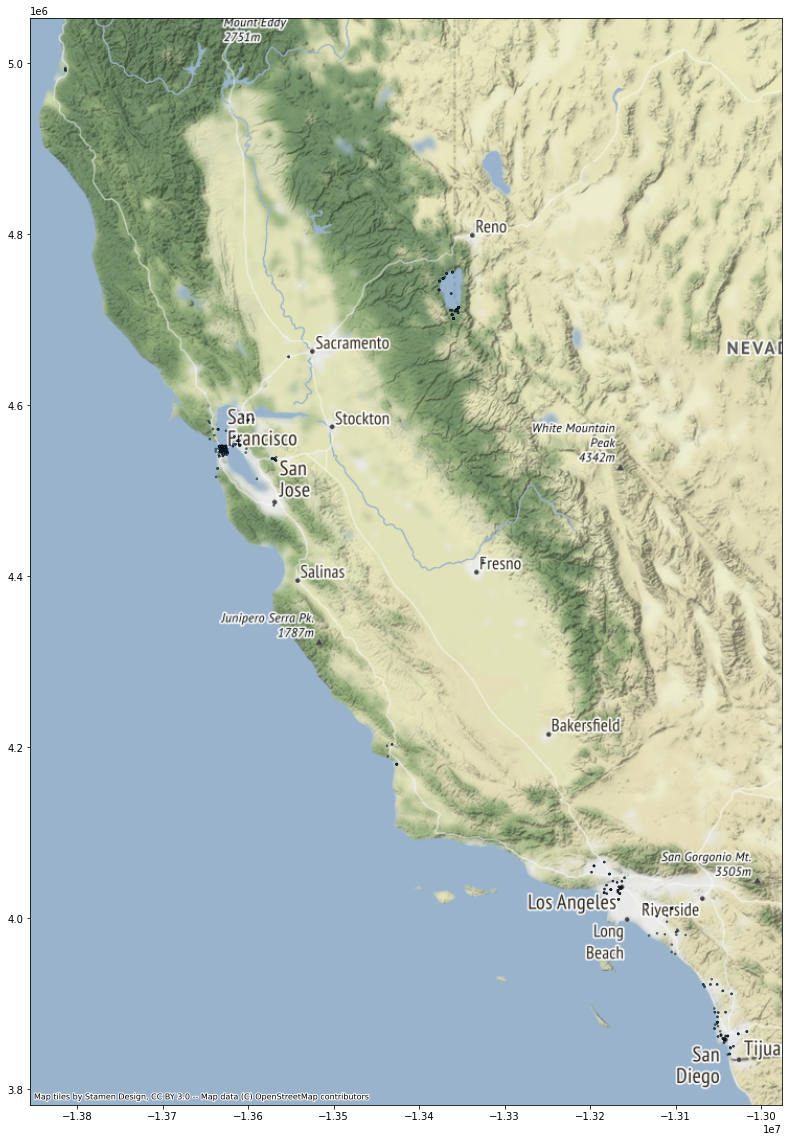

In [10]:
import contextily as ctx
gdfm = gdf1.to_crs(epsg=3857) # This EPSG-3857 just for ploting
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# import socio-demographic data

In [137]:
# Input the block group shape file of your study area here
bg=gpd.read_file("C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Block_Gp/nhgis0101_shape/nhgis0101_shape/nhgis0101_shapefile_tl2019_060_blck_grp_2019/CA_blck_grp_2019.shp")

# Input Race csv file here
race=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/sex by age.csv")

# Input education csv file here
edu=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/Education attainment.csv")

# Import school enrollmemt 
scll=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/School enrollment.csv")
# Input Median age csv file here
age=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/Median age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/Median HH Income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/HH Type.csv")

# Input Population csv file here
pdensity=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/Sociodemographic_data/Transportation.csv")

# Now calculate the land use variables within the buffer

In [11]:
## Try to pull whole CA state Network using polygon
ca_poly=gpd.read_file('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/ca-state-boundary/CA_State_TIGER2016.shp',encoding='utf-8')
ca_poly2=gpd.GeoDataFrame(ca_poly, geometry='geometry', crs='EPSG:3857')
ten_mile=16093.4
ca_poly2['geometry'] = ca_poly2['geometry'].buffer(ten_mile)
ca_poly3=ca_poly2.to_crs("epsg:4326")
ca_poly3

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-124.59631 40.52064, -124.5962..."


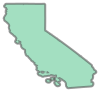

In [12]:
# lets use buffer only to extract the land use
polygon=ca_poly3.loc[0,'geometry']
polygon

In [13]:
gdf1.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
#!chcp 1252
!chcp 65001

Active code page: 65001


In [15]:
#tags = {'landuse': 'grass'}
#industrial = ox.geometries_from_polygon(polygon, tags)
#industrial.head()

In [16]:
#https://wiki.openstreetmap.org/wiki/Key:landuse
tags = {'landuse': ['grass','commercial','industrial','residential','retail','institutional','forest','education']}
landuse = ox.geometries_from_polygon(polygon, tags)
landuse.head()

geometry  \
element_type osmid                                                            
node         596183787                          POINT (-117.24583 32.74844)   
             596796626                          POINT (-117.22827 32.73877)   
             10836166839                        POINT (-117.15803 32.81643)   
way          28788199     POLYGON ((-117.15353 32.74862, -117.15538 32.7...   
             31240713     POLYGON ((-117.17202 32.70947, -117.17211 32.7...   

                          addr:city addr:housenumber addr:postcode  \
element_type osmid                                                   
node         596183787    San Diego             4851         92107   
             596796626    San Diego             2151         92106   
             10836166839        NaN              NaN           NaN   
way          28788199           NaN              NaN           NaN   
             31240713           NaN              NaN           NaN   

                                   addr:street  \
element_type osmid                               
node         596183787         Brighton Avenue   
             596796626    Chatsworth Boulevard   
             10836166839                   NaN   
way          28788199                      NaN   
             31240713                      NaN   

                                               description      landuse  \
element_type osmid                                                        
node         596183787    La Casa Bonita apartment complex  residential   
             596796626                                 NaN  residential   
             10836166839                               NaN   industrial   
way          28788199                                  NaN       retail   
             31240713                                  NaN       retail   

                         residential  \
element_type osmid                     
node         596183787    apartments   
             596796626    apartments   
             10836166839         NaN   
way          28788199            NaN   
             31240713            NaN   

                                                                     source  \
element_type osmid                                                            
node         596183787    SanGIS Addresses Public Domain (http://www.san...   
             596796626    SanGIS Addresses Public Domain (http://www.san...   
             10836166839                                                NaN   
way          28788199                                                   NaN   
             31240713                                                   NaN   

                         addr:country  ... PMT_SITE P_S_COMM  \
element_type osmid                     ...                     
node         596183787            NaN  ...      NaN      NaN   
             596796626            NaN  ...      NaN      NaN   
             10836166839          NaN  ...      NaN      NaN   
way          28788199             NaN  ...      NaN      NaN   
             31240713             NaN  ...      NaN      NaN   

                         recycling:aluminium recycling:electrical_appliances  \
element_type osmid                                                             
node         596183787                   NaN                             NaN   
             596796626                   NaN                             NaN   
             10836166839                 NaN                             NaN   
way          28788199                    NaN                             NaN   
             31240713                    NaN                             NaN   

                         landuse:historic agrarian iucn_level protected  \
element_type osmid                                                        
node         596183787                NaN      NaN        NaN       NaN   
             596796626                NaN      NaN        NaN       NaN   


In [17]:
landuse['landuse'].unique()

array(['residential', 'industrial', 'retail', 'commercial', 'grass',
       'forest', 'education', 'institutional'], dtype=object)

In [18]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
landuse["geometry"]=landuse.geometry.buffer(0)
landuse = landuse.reset_index(level=0)
landuse = landuse.reset_index(level=0)
landuse.head(2)

,osmid,element_type,geometry,addr:city,addr:housenumber,addr:postcode,addr:street,description,landuse,residential,...,PMT_SITE,P_S_COMM,recycling:aluminium,recycling:electrical_appliances,landuse:historic,agrarian,iucn_level,protected,protection_object,site_ownership
0,596183787,node,POLYGON EMPTY,San Diego,4851,92107,Brighton Avenue,La Casa Bonita apartment complex,residential,apartments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,596796626,node,POLYGON EMPTY,San Diego,2151,92106,Chatsworth Boulevard,NaN,residential,apartments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
landuse1=landuse[['osmid','geometry','landuse']]
landuse2=gpd.GeoDataFrame(landuse1, geometry='geometry', crs={'init': 'epsg:4326'})
luse_proj = landuse2.to_crs(epsg=32610)
luse_proj.head()

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,osmid,geometry,landuse
0,596183787,POLYGON EMPTY,residential
1,596796626,POLYGON EMPTY,residential
2,10836166839,POLYGON EMPTY,industrial
3,28788199,"POLYGON ((1048092.834 3638578.805, 1047920.026...",retail
4,31240713,"POLYGON ((1046596.974 3634133.639, 1046587.996...",retail


In [20]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

,osmid,geometry,landuse
24232,147001256,"POLYGON ((1051147.546 3619847.393, 1051144.803...",grass
24144,44501608,"POLYGON ((1051137.055 3619910.121, 1051132.671...",commercial
26417,908524418,"POLYGON ((1053068.716 3620385.885, 1053084.627...",commercial
26096,783224850,"POLYGON ((1053275.671 3620713.569, 1053306.266...",residential
26100,783224854,"POLYGON ((1053582.362 3620730.104, 1053583.920...",residential


In [21]:
buffer_clip.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
gdf1.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
#intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
#intdata.head(5)

In [24]:
intdata = gpd.sjoin( buffer_clip,gdf1, how="inner", op='intersects')
intdata.head()

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,osmid,geometry,landuse,index_right,ID,latitude,longitude
24232,147001256,"POLYGON ((1051147.546 3619847.393, 1051144.803...",grass,911664,3578,32.58399,-117.130775
24144,44501608,"POLYGON ((1051137.055 3619910.121, 1051132.671...",commercial,911664,3578,32.58399,-117.130775
26417,908524418,"POLYGON ((1053068.716 3620385.885, 1053084.627...",commercial,876600,3577,32.58770,-117.107025
26096,783224850,"POLYGON ((1053275.671 3620713.569, 1053306.266...",residential,876600,3577,32.58770,-117.107025
26100,783224854,"POLYGON ((1053582.362 3620730.104, 1053583.920...",residential,876600,3577,32.58770,-117.107025


In [25]:
intdata["Area"]=intdata["geometry"].area*3.86102e-7 # in mile2
intdata.head(5)

,osmid,geometry,landuse,index_right,ID,latitude,longitude,Area
24232,147001256,"POLYGON ((1051147.546 3619847.393, 1051144.803...",grass,911664,3578,32.58399,-117.130775,0.000581
24144,44501608,"POLYGON ((1051137.055 3619910.121, 1051132.671...",commercial,911664,3578,32.58399,-117.130775,0.000441
26417,908524418,"POLYGON ((1053068.716 3620385.885, 1053084.627...",commercial,876600,3577,32.58770,-117.107025,0.000369
26096,783224850,"POLYGON ((1053275.671 3620713.569, 1053306.266...",residential,876600,3577,32.58770,-117.107025,0.001018
26100,783224854,"POLYGON ((1053582.362 3620730.104, 1053583.920...",residential,876600,3577,32.58770,-117.107025,0.000730


In [26]:
output_landuse=intdata.groupby(by=['ID','landuse'])['Area'].sum().reset_index()
output_landuse.columns=['ID','landuse','Area']
output_landuse.head()

,ID,landuse,Area
0,671,grass,0.034338
1,671,retail,0.036196
2,1127,commercial,0.002189
3,1127,grass,0.000828
4,1127,residential,0.000472


In [27]:
output_landuse['landuse'].unique()

array(['grass', 'retail', 'commercial', 'residential', 'forest',
       'industrial', 'institutional', 'education'], dtype=object)

In [28]:
#'grass','commercial','industrial','residential','retail','institutional','forest','education'
# Calculate commercial area
commercial  = intdata[intdata['landuse'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['ID'])['Area'].sum().reset_index()
output_commercial.columns=['ID','Commercial Area ']
output_commercial.head()

,ID,Commercial Area
0,1127,0.002189
1,2691,0.008590
2,2692,0.008590
3,2694,0.226432
4,2695,0.382664


In [29]:
# Distance to commerical area
eco=eco_counter2_proj
commercialcc=commercial.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(commercialcc,))*0.000621371 # mile
commercialcc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
commercialcc_distance.columns=["ID","Distance to commercial area"]
commercialcc_distance.head()

,ID,Distance to commercial area
0,671,0.797617
35064,1127,0.249510
70128,2415,0.687274
105192,2691,0.397234
140256,2692,0.397234


In [30]:
# Calculate retail area
retail  = intdata[intdata['landuse'].str.contains('retail')]
output_retail = retail.groupby(by=['ID'])['Area'].sum().reset_index()
output_retail.columns=['ID','retail Area ']
output_retail.head()

,ID,retail Area
0,671,0.036196
1,1127,0.165813
2,2415,0.087677
3,2691,0.009334
4,2692,0.009334


In [31]:
output_retail.shape

(300, 2)

In [32]:
# Distance to retail area
retailcc=retail.copy()
retailcc['geometry']=retailcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(retailcc,))*0.000621371
retailcc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
retailcc_distance.columns=["ID","Distance to retail area"]
retailcc_distance.head()

,ID,Distance to retail area
0,671,0.527663
35064,1127,0.131352
70128,2415,0.155897
105192,2691,0.254896
140256,2692,0.254896


In [33]:
# Calculate industrial area
industrial  = intdata[intdata['landuse'].str.contains('industrial')]
output_industrial = industrial.groupby(by=['ID'])['Area'].sum().reset_index()
output_industrial.columns=['ID','industrial Area ']
output_industrial.head()

,ID,industrial Area
0,2695,0.064333
1,2735,0.000676
2,3560,0.083849
3,3562,0.349140
4,3565,0.069533


In [34]:
# Distance to retail area
industrialcc=industrial.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(industrialcc,))*0.000621371
industrialcc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
industrialcc_distance.columns=["ID","Distance to industrial area"]
industrialcc_distance.head()

,ID,Distance to industrial area
0,671,1.187386
35064,1127,1.762761
70128,2415,1.156915
105192,2691,118.763726
140256,2692,118.763726


In [35]:
# Calculate residential area
residential  = intdata[intdata['landuse'].str.contains('residential')]
output_residential = residential.groupby(by=['ID'])['Area'].sum().reset_index()
output_residential.columns=['ID','residential Area ']
output_residential.head()

,ID,residential Area
0,1127,0.000472
1,2415,0.012237
2,2691,0.108057
3,2692,0.108057
4,2694,0.237475


In [36]:
# Distance to residential area
residentialcc=residential.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(residentialcc,))*0.000621371
residentialcc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
residentialcc_distance.columns=["ID","Distance to residential area"]
residentialcc_distance.head()

,ID,Distance to residential area
0,671,1.042018
35064,1127,0.490861
70128,2415,0.460795
105192,2691,0.165330
140256,2692,0.165330


In [37]:
# Calculate grass area
grass  = intdata[intdata['landuse'].str.contains('grass')]
output_grass = grass.groupby(by=['ID'])['Area'].sum().reset_index()
output_grass.columns=['ID','grass Area ']
output_grass.head()

,ID,grass Area
0,671,0.034338
1,1127,0.000828
2,2415,0.000559
3,2694,0.000665
4,2695,0.004706


In [38]:
# Distance to grass area
grasscc=grass.copy()
grasscc['geometry']=grasscc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(grasscc,))*0.000621371
grasscc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
grasscc_distance.columns=["ID","Distance to grass area"]
grasscc_distance.head()

,ID,Distance to grass area
0,671,0.093680
35064,1127,0.118616
70128,2415,0.481244
105192,2691,7.255749
140256,2692,7.255749


In [39]:
# Calculate forest area
forest  = intdata[intdata['landuse'].str.contains('forest')]
output_forest = forest.groupby(by=['ID'])['Area'].sum().reset_index()
output_forest.columns=['ID','forest Area ']
output_forest.head()

,ID,forest Area
0,2415,0.002535
1,3566,0.015817
2,3582,0.030896
3,3583,0.030896
4,3590,0.027680


In [40]:
# Distance to forest area
forestcc=forest.copy()
forestcc['geometry']=forestcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(forestcc,))*0.000621371
forestcc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
forestcc_distance.columns=["ID","Distance to forest area"]
forestcc_distance.head()

,ID,Distance to forest area
0,671,1.128419
35064,1127,1.740720
70128,2415,0.390357
105192,2691,157.018697
140256,2692,157.018697


In [41]:
# Calculate education area
education  = intdata[intdata['landuse'].str.contains('education')]
output_education = education.groupby(by=['ID'])['Area'].sum().reset_index()
output_education.columns=['ID','education Area ']
output_education.head()

,ID,education Area
0,18381,0.003218
1,72041,0.031925
2,72042,0.031925
3,89287,0.029223
4,89288,0.029223


In [42]:
# Distance to education area
educationcc=education.copy()
educationcc['geometry']=educationcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(educationcc,))*0.000621371
educationcc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
educationcc_distance.columns=["ID","Distance to education area"]
educationcc_distance.head()

,ID,Distance to education area
0,671,4.309764
35064,1127,5.468288
70128,2415,3.698075
105192,2691,156.174890
140256,2692,156.174890


In [43]:
# Calculate institutional area
institutional  = intdata[intdata['landuse'].str.contains('institutional')]
output_institutional = institutional.groupby(by=['ID'])['Area'].sum().reset_index()
output_institutional.columns=['ID','institutional Area ']
output_institutional.head()

,ID,institutional Area
0,2735,0.002405
1,5208,0.000885
2,5209,0.004017
3,5210,0.004017
4,5211,0.000885


In [44]:
# Distance to education area
institutionalcc=institutional.copy()
institutionalcc['geometry']=institutionalcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(institutionalcc,))*0.000621371
institutionalcc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
institutionalcc_distance.columns=["ID","Distance to institutional area"]
institutionalcc_distance.head()

,ID,Distance to institutional area
0,671,1.707029
35064,1127,1.056462
70128,2415,1.107919
105192,2691,192.421590
140256,2692,192.421590


# import water area, park area, school, college, universities and CBD

In [45]:
tags = {'natural': ['water']}
water= ox.geometries_from_polygon(polygon, tags)
water_proj = water.to_crs(epsg=32610)

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:872: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome

In [46]:
water_proj.head()

geometry  \
element_type osmid                                                          
way          31293255   POLYGON ((1039942.198 3640841.313, 1039942.146...   
             167288119  POLYGON ((1040961.984 3639035.982, 1040974.562...   
             183210868  POLYGON ((1040059.383 3640995.871, 1040061.835...   
             183210869  POLYGON ((1040129.162 3641002.235, 1040130.512...   
             183210870  POLYGON ((1040102.419 3641135.426, 1040103.502...   

                       waterway  \
element_type osmid                
way          31293255       NaN   
             167288119      NaN   
             183210868      NaN   
             183210869      NaN   
             183210870      NaN   

                                                                    nodes  \
element_type osmid                                                          
way          31293255   [348160420, 348160421, 1931199826, 348160422, ...   
             167288119  [2411590197, 2411590193, 4573341413, 178695443...   
             183210868  [1935787399, 1935787388, 1935787371, 193578737...   
             183210869  [1935787403, 1935787394, 1935787393, 193578738...   
             183210870  [1935787617, 1935787601, 1935787619, 193578762...   

                       natural wetland              name  water source tidal  \
element_type osmid                                                             
way          31293255    water     NaN  Model Yacht Pond   pond    NaN   NaN   
             167288119   water     NaN     Famosa Slough  river   Bing   yes   
             183210868   water     NaN               NaN    NaN    NaN   NaN   
             183210869   water     NaN               NaN    NaN    NaN   NaN   
             183210870   water     NaN               NaN    NaN    NaN   NaN   

                       golf  ... memorial SHAPE_area SHAPE_len length  \
element_type osmid           ...                                        
way          31293255   NaN  ...      NaN        NaN       NaN    NaN   
             167288119  NaN  ...      NaN        NaN       NaN    NaN   
             183210868  NaN  ...      NaN        NaN       NaN    NaN   
             183210869  NaN  ...      NaN        NaN       NaN    NaN   
             183210870  NaN  ...      NaN        NaN       NaN    NaN   

                       animal_keeping hazmat name:Pomo animals estuary  \
element_type osmid                                                       
way          31293255             NaN    NaN       NaN     NaN     NaN   
             167288119            NaN    NaN       NaN     NaN     NaN   
             183210868            NaN    NaN       NaN     NaN     NaN   
             183210869            NaN    NaN       NaN     NaN     NaN   
             183210870            NaN    NaN       NaN     NaN     NaN   

                       supervised  
element_type osmid                 
way          31293255         NaN  
             167288119        NaN  
             183210868        NaN  
             183210869        NaN  
             183210870        NaN  

[5 rows x 301 columns]

In [47]:
#tags = {'natural': ['bay','strait']}
#water1= ox.geometries_from_polygon(polygon, tags)
#water_proj1 = water1.to_crs(epsg=32610)

In [48]:
tags = {'landuse': ['reservoir']}
water2= ox.geometries_from_polygon(polygon, tags)

In [49]:
water_proj2 = water2.to_crs(epsg=32610)
water_proj2.head()

ele gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                        
node         358785196   29            073   01/19/1981          243068   
             358790492  256            073   01/19/1981          247345   
             358844938  254            073   06/13/2000         1868914   
             358844947   18            073   06/13/2000         1868928   
relation     4010580     44            073   11/22/1996         1701233   

                       gnis:state_id    landuse                 name  \
element_type osmid                                                     
node         358785196            06  reservoir         Guajome Lake   
             358790492            06  reservoir  Pechstein Reservoir   
             358844938            06  reservoir           South Lake   
             358844947            06  reservoir      Lake Val Sereno   
relation     4010580              06  reservoir       Fairbanks Lake   

                                                                 geometry  \
element_type osmid                                                          
node         358785196                    POINT (1033151.776 3693162.502)   
             358790492                    POINT (1043081.756 3686748.094)   
             358844938                    POINT (1044473.345 3679213.667)   
             358844947                    POINT (1039552.596 3671478.261)   
relation     4010580    POLYGON ((1043908.779 3666728.233, 1043912.312...   

                                        ways          type  ... designation  \
element_type osmid                                          ...               
node         358785196                   NaN           NaN  ...         NaN   
             358790492                   NaN           NaN  ...         NaN   
             358844938                   NaN           NaN  ...         NaN   
             358844947                   NaN           NaN  ...         NaN   
relation     4010580    [96671990, 96671993]  multipolygon  ...         NaN   

                       created_by addr:state note acres canoe  \
element_type osmid                                              
node         358785196        NaN        NaN  NaN   NaN   NaN   
             358790492        NaN        NaN  NaN   NaN   NaN   
             358844938        NaN        NaN  NaN   NaN   NaN   
             358844947        NaN        NaN  NaN   NaN   NaN   
relation     4010580          NaN        NaN  NaN   NaN   NaN   

                       scvwd:SHAPE_AREA scvwd:WB_TYPE ship gnis:edited  
element_type osmid                                                      
node         358785196              NaN           NaN  NaN         NaN  
             358790492              NaN           NaN  NaN         NaN  
             358844938              NaN           NaN  NaN         NaN  
             358844947              NaN           NaN  NaN         NaN  
relation     4010580                NaN           NaN  NaN         NaN  

[5 rows x 67 columns]

In [50]:
#tags =  {'waterway': ['riverbank','river','canal','drain','ditch','stream','brook','wadi','drystream']}
#water3= ox.geometries_from_polygon(polygon, tags)
#water_proj3 = water3.to_crs(epsg=32610)

In [51]:
tags =  {'waterway': ['riverbank','river']}
water3= ox.geometries_from_polygon(polygon, tags)
water_proj3 = water3.to_crs(epsg=32610)

In [52]:
water_proj3.head()

nodes  \
element_type osmid                                                          
way          38087883   [1273837122, 5468201310, 5468201309, 546820130...   
             105263530  [1213074738, 1213074740, 1896878114, 189687811...   
             62344685   [1297877836, 828402213, 828402214, 828402215, ...   
             95479854   [1107110956, 1107110958, 1107110960, 110711096...   
             95479855   [1107110988, 1107110993, 1107110996, 110711099...   

                       waterway  \
element_type osmid                
way          38087883     river   
             105263530    river   
             62344685     river   
             95479854     river   
             95479855     river   

                                                                 geometry  \
element_type osmid                                                          
way          38087883   LINESTRING (1040611.334 3646437.440, 1040620.4...   
             105263530  LINESTRING (1047880.018 3640961.724, 1047842.5...   
             62344685   LINESTRING (1044753.407 3719283.886, 1044738.9...   
             95479854   LINESTRING (1037897.448 3658173.263, 1037868.9...   
             95479855   LINESTRING (1037690.925 3658189.047, 1037653.0...   

                                         name fixme source source_ref layer  \
element_type osmid                                                            
way          38087883                     NaN   NaN    NaN        NaN   NaN   
             105263530        San Diego River   NaN    NaN        NaN   NaN   
             62344685   Santa Margarita River   NaN    NaN        NaN   NaN   
             95479854                     NaN   NaN    NaN        NaN     1   
             95479855                     NaN   NaN    NaN        NaN     1   

                       intermittent FIXME  ... scvwd:ROUTEID scvwd:COVERED  \
element_type osmid                         ...                               
way          38087883           NaN   NaN  ...           NaN           NaN   
             105263530          NaN   NaN  ...           NaN           NaN   
             62344685           NaN   NaN  ...           NaN           NaN   
             95479854           NaN   NaN  ...           NaN           NaN   
             95479855           NaN   NaN  ...           NaN           NaN   

                       designation material gns:id tunnel:ref motorboat  \
element_type osmid                                                        
way          38087883          NaN      NaN    NaN        NaN       NaN   
             105263530         NaN      NaN    NaN        NaN       NaN   
             62344685          NaN      NaN    NaN        NaN       NaN   
             95479854          NaN      NaN    NaN        NaN       NaN   
             95479855          NaN      NaN    NaN        NaN       NaN   

                       name:Pomo tiger:reviewed name:wiy  
element_type osmid                                        
way          38087883        NaN            NaN      NaN  
             105263530       NaN            NaN      NaN  
             62344685        NaN            NaN      NaN  
             95479854        NaN            NaN      NaN  
             95479855        NaN            NaN      NaN  

[5 rows x 102 columns]

In [53]:
#tags = {'place': ['sea','ocean']}
#water4= ox.geometries_from_polygon(polygon, tags)
#water_proj4 = water4.to_crs(epsg=32610)
#water_proj4.head()

In [54]:
# read the whole ocean shape file as OSM tag not covering the ocean properly
ocean=gpd.read_file('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/World_Seas_IHO_v3/World_Seas_IHO_v3.shp')
#tags = {'place': ['sea','ocean']}
#water4= ox.geometries_from_polygon(polygon, tags)
water=gpd.clip(ocean,ca_poly3)
water_proj4 = water.to_crs(epsg=32610)
water_proj4.head()

,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry
72,North Pacific Ocean,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,65154681,1908,"MULTIPOLYGON (((388094.982 4662144.120, 388189..."


In [55]:
water_proj5=pd.concat([water_proj,water_proj2,water_proj3,water_proj4],axis=0)
#water_proj5=water_proj5.loc[water_proj5['ID']]
water_proj5 = water_proj5[water_proj5['ID'].notna()]
water_proj5.tail()

,geometry,waterway,nodes,natural,wetland,name,water,source,tidal,golf,...,name:wiy,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,MRGID
72,"MULTIPOLYGON (((388094.982 4662144.120, 388189...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,North Pacific Ocean,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0


In [56]:
water_proj5["geometry"]=water_proj5.geometry.buffer(0)
buffer_clip_water = gpd.clip(water_proj5, gdf1)
intdata_water=gpd.overlay(gdf1, buffer_clip_water, how='intersection', make_valid=True, keep_geom_type=False)
intdata_water["Area"]=intdata_water["geometry"].area*3.86102e-7 # in mile2
output_water =intdata_water.groupby(by=['ID_1'])['Area'].sum().reset_index()
output_water.columns=['ID','water Area']
output_water.head()

,ID,water Area
0,3561,0.135177
1,3563,0.211582
2,3567,0.239259
3,3569,0.318112
4,3571,0.298691


In [57]:
intdata_water

,ID_1,latitude,longitude,waterway,nodes,natural,wetland,name,water,source,...,ID_2,Longitude,Latitude,min_X,min_Y,max_X,max_Y,MRGID,geometry,Area
0,3561,33.203396,-117.38739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((1023516.293 3687101.750, 1023437.422...",0.135177
1,3563,32.991085,-117.27147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((1035397.582 3664117.036, 1035320.982...",0.211582
2,3567,32.789646,-117.20898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((1042329.333 3642105.937, 1042257.948...",0.239259
3,3569,33.181255,-117.37246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((1025343.599 3684808.622, 1025272.214...",0.318112
4,3571,32.727970,-117.18266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((1046228.214 3635825.556, 1046194.452...",0.298691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,99080,37.805290,-122.44702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((547877.644 4184434.766, 547889.231 4...",0.298954
85,99081,37.805290,-122.44702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((547877.644 4184434.766, 547889.231 4...",0.298954
86,99082,37.805290,-122.44702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((547877.644 4184434.766, 547889.231 4...",0.298954
87,99084,37.805290,-122.44702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,-40.157441,23.962394,-76.98544,2.000000e-11,128.686531,58.211545,1908.0,"POLYGON ((547877.644 4184434.766, 547889.231 4...",0.298954


In [58]:
# Distance to water Body
watercc=water_proj5.copy()
watercc['geometry']=watercc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(watercc,))*0.000621371
watercc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
watercc_distance.columns=["ID","Distance to water area"]
watercc_distance.head()

,ID,Distance to water area
0,671,157.013198
35064,1127,156.083563
70128,2415,155.334876
105192,2691,43.931308
140256,2692,43.931308


In [59]:
# Park area
tags = {'leisure': ['park']}
park= ox.geometries_from_polygon(polygon, tags)
park_proj = park.to_crs(epsg=32610)
park_proj["geometry"]=park_proj.geometry.buffer(0)

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [60]:
buffer_clip_park = gpd.clip(park_proj, gdf1)
intdata_park=gpd.overlay(gdf1, buffer_clip_park, how='intersection', make_valid=True, keep_geom_type=False)
intdata_park["Area"]=intdata_park["geometry"].area*3.86102e-7 # in ft2
output_park =intdata_park.groupby(by=['ID_1'])['Area'].sum().reset_index()
output_park.columns=['ID','park Area ']
output_park.head()

,ID,park Area
0,671,0.501797
1,1127,0.013954
2,2415,0.073592
3,2691,0.016520
4,2692,0.016520


In [61]:
# Distance to park
parkcc=park_proj.copy()
parkcc['geometry']=parkcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(parkcc,))*0.000621371
parkcc_distance=eco.loc[:,['ID','min_dist_to_polygon']]
parkcc_distance.columns=["ID","Distance to Park Center"]
parkcc_distance.head()

,ID,Distance to Park Center
0,671,0.568418
35064,1127,0.070095
70128,2415,0.172640
105192,2691,0.349027
140256,2692,0.349027


In [62]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
scl_proj = scl.to_crs(epsg=32610)
scl_proj ["geometry"]=scl_proj.geometry.buffer(0)

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [63]:
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
output_school=inter_scl.groupby(by=['ID_1'])['geometry'].count().reset_index()
output_school.columns=["ID","School"]
output_school.head()

,ID,School
0,671,1
1,1127,7
2,2415,4
3,2694,1
4,2735,3


In [64]:
# Distance to School
eco['min_dist_to_school'] = eco.geometry.apply(min_distance_ppoly, args=(scl_proj,))*0.000621371
output_school_distance=eco.loc[:,["ID","min_dist_to_school"]]
output_school_distance.columns=["ID","min_dist_to_school"]
output_school_distance.head()

,ID,min_dist_to_school
0,671,0.283585
35064,1127,0.141992
70128,2415,0.354334
105192,2691,0.502583
140256,2692,0.502583


In [65]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
coll_proj = coll.to_crs(epsg=32610)

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [66]:
# Reproject the geometries by replacing the values with projected ones
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)
output_college=inter_coll.groupby(by=['ID'])['geometry'].count().reset_index()
output_college.columns=["ID","college"]
output_college.head()

,ID,college
0,1127,1
1,2735,1
2,3560,1
3,3608,2
4,3609,1


In [67]:
# Distance to College
eco['min_dist_to_college'] = eco.geometry.apply(min_distance_ppoly, args=(coll_proj,))*0.000621371
output_college_distance=eco.loc[:,["ID","min_dist_to_college"]]
output_college_distance.columns=["ID","min_dist_to_college"]
output_college_distance.head()

,ID,min_dist_to_college
0,671,0.698413
35064,1127,0.400487
70128,2415,0.580599
105192,2691,1.080460
140256,2692,1.080460


In [68]:
# Import University
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
uni_proj = uni.to_crs(epsg=32610)

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [69]:
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)
output_university=inter_uni.groupby(by=['ID'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["ID","University"]
output_university.head()

,ID,University
0,1127,1
1,3590,1
2,3591,1
3,3592,1
4,3608,1


In [70]:
# Distance to University
eco['min_dist_to_university'] = eco.geometry.apply(min_distance_ppoly, args=(uni_proj,))*0.000621371
output_university_distance=eco.loc[:,["ID","min_dist_to_university"]]
output_university_distance.columns=["ID","min_dist_to_university"]
output_university_distance.head()

,ID,min_dist_to_university
0,671,1.026441
35064,1127,0.244842
70128,2415,0.580796
105192,2691,1.327530
140256,2692,1.327530


In [71]:
# Import City Hall for CBD

In [72]:
#https://wiki.openstreetmap.org/wiki/Tag:amenity%3Dtownhall
# Import University
tags = {'office': 'government'}
city_hall = ox.geometries_from_polygon(polygon, tags)
city_proj = city_hall.to_crs(epsg=32610)
city_proj.head()

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


geometry  addr:city  \
element_type osmid                                                    
node         1222785403  POINT (1043769.303 3639317.931)  San Diego   
             1429594309  POINT (1044760.406 3646571.034)        NaN   
             3380573820  POINT (1047592.565 3635051.000)        NaN   
             6818538710  POINT (1047286.406 3635140.869)  San Diego   
             6852207791  POINT (1042874.454 3638000.793)  San Diego   

                        addr:county addr:housenumber addr:postcode addr:state  \
element_type osmid                                                              
node         1222785403   San Diego             2900         92110         CA   
             1429594309         NaN              NaN           NaN        NaN   
             3380573820         NaN              NaN           NaN        NaN   
             6818538710         NaN             1222         92101         CA   
             6852207791         NaN             3207         92110        NaN   

                              addr:street attribution caltrans:district  \
element_type osmid                                                        
node         1222785403      Sunset Place    Caltrans                11   
             1429594309               NaN         NaN               NaN   
             3380573820               NaN         NaN               NaN   
             6818538710  Civic Center Plz         NaN               NaN   
             6852207791   Rosecrans Place         NaN               NaN   

                        caltrans:dynsegpm  ... name_3  \
element_type osmid                         ...          
node         1222785403        SD 5 R19.8  ...    NaN   
             1429594309               NaN  ...    NaN   
             3380573820               NaN  ...    NaN   
             6818538710               NaN  ...    NaN   
             6852207791               NaN  ...    NaN   

                        check_date:opening_hours rwc_ca:id  \
element_type osmid                                           
node         1222785403                      NaN       NaN   
             1429594309                      NaN       NaN   
             3380573820                      NaN       NaN   
             6818538710                      NaN       NaN   
             6852207791                      NaN       NaN   

                        redwood_city_ca:addr_id redwood_city_ca:bld_gid  \
element_type osmid                                                        
node         1222785403                     NaN                     NaN   
             1429594309                     NaN                     NaN   
             3380573820                     NaN                     NaN   
             6818538710                     NaN                     NaN   
             6852207791                     NaN                     NaN   

                        historic:name room building:min_level building:use  \
element_type osmid                                                           
node         1222785403           NaN  NaN                NaN          NaN   
             1429594309           NaN  NaN                NaN          NaN   
             3380573820           NaN  NaN                NaN          NaN   
             6818538710           NaN  NaN                NaN          NaN   
             6852207791           NaN  NaN                NaN          NaN   

                        image  
element_type osmid             
node         1222785403   NaN  
             1429594309   NaN  
             3380573820   NaN  
             6818538710   NaN  
             6852207791   NaN  

[5 rows x 162 columns]

In [73]:
city_proj['name'].unique()

array(['Caltrans District 11 Office',
       'California Women, Infants, and Children',
       'San Diego Association of Governments',
       'San Diego Civic Center West',
       'Fleet And Family Support Center Gateway Village',
       'San Diego County Family Resource',
       'County Health Services Complex', 'Department of Motor Vehicles',
       'Caltrans', 'CHP & CALTRANS Traffic Management Center', nan,
       'Center for Information Dominance', 'US Navy Headquarters',
       'TSA Checkpoint', 'TSA PreCheck Enrollment Center',
       'Global Entry Enrollment on Arrival', 'Mobile Passport Control',
       'Global Entry Enrollment Center',
       'Solana Beach School District Office',
       'Social Security Administration', 'Lincoln Military Stuart Mesa',
       'NOAA Corps',
       'Federal Bureau of Investigation San Diego Field Office', 'DMV',
       'DEA', 'Carmel Valley Lab', 'City of San Clemente Planning Office',
       'Riverside County Clerk-Recorder / Probation Departm

In [74]:
# Consider the rows that have city hall
city_proj1 = city_proj[city_proj['name'].str.contains('City Hall', regex=False, case=False, na=False)]
city_proj2 = city_proj[city_proj['name'].str.contains('Town Hall', regex=False, case=False, na=False)]
city_proj3 = city_proj[city_proj['name'].str.contains('Civic Center', regex=False, case=False, na=False)]
city_proj4 = city_proj[city_proj['name'].str.contains('Administration Building', regex=False, case=False, na=False)]
city_proj5=pd.concat([city_proj1,city_proj2,city_proj3,city_proj4])
city_proj5.head(10)

geometry  \
element_type osmid                                                           
way          112118983   POLYGON ((1034649.077 3732065.696, 1034663.385...   
             121955310   POLYGON ((1044017.504 3721485.443, 1044024.254...   
             209270564   POLYGON ((944829.448 3850371.218, 944846.030 3...   
             471874512   POLYGON ((938242.418 3788620.613, 938241.412 3...   
node         4062492515                     POINT (879019.791 3801644.759)   
way          356876850   POLYGON ((598694.398 4132973.432, 598697.618 4...   
             642042743   POLYGON ((525086.127 4254543.856, 525115.333 4...   
node         4487681064                     POINT (511000.571 4273735.989)   
             2782370424                     POINT (393468.409 4656723.230)   
way          494843929   POLYGON ((1031308.010 3835566.489, 1031311.656...   

                          addr:city addr:county addr:housenumber  \
element_type osmid                                                 
way          112118983     Wildomar         NaN            23873   
             121955310          NaN         NaN              NaN   
             209270564    Lancaster         NaN            44933   
             471874512     Glendale         NaN              613   
node         4062492515         NaN         NaN              NaN   
way          356876850          NaN         NaN              NaN   
             642042743          NaN         NaN              NaN   
node         4487681064  Healdsburg         NaN              401   
             2782370424   Brookings         NaN              898   
way          494843929          NaN         NaN              NaN   

                        addr:postcode addr:state         addr:street  \
element_type osmid                                                     
way          112118983          92595        NaN  Clinton Keith Road   
             121955310            NaN        NaN                 NaN   
             209270564          93534         CA         Fern Avenue   
             471874512    91204;91206         CA       East Broadway   
node         4062492515           NaN        NaN                 NaN   
way          356876850            NaN        NaN                 NaN   
             642042743            NaN        NaN                 NaN   
node         4487681064         95448         CA        Grove Street   
             2782370424         97415        NaN           Elk Drive   
way          494843929            NaN        NaN                 NaN   

                        attribution caltrans:district caltrans:dynsegpm  ...  \
element_type osmid                                                       ...   
way          112118983          NaN               NaN               NaN  ...   
             121955310          NaN               NaN               NaN  ...   
             209270564          NaN               NaN               NaN  ...   
             471874512          NaN               NaN               NaN  ...   
node         4062492515         NaN               NaN               NaN  ...   
way          356876850          NaN               NaN               NaN  ...   
             642042743          NaN               NaN               NaN  ...   
node         4487681064         NaN               NaN               NaN  ...   
             2782370424         NaN               NaN               NaN  ...   
way          494843929          NaN               NaN               NaN  ...   

                        name_3 check_date:opening_hours rwc_ca:id  \
element_type osmid                                                  
way          112118983     NaN                      NaN       NaN   
             121955310     NaN                      NaN       NaN   
             209270564     NaN                      NaN       NaN   
             471874512     NaN                      NaN       NaN   
node         4062492515    NaN                      NaN       NaN   
way

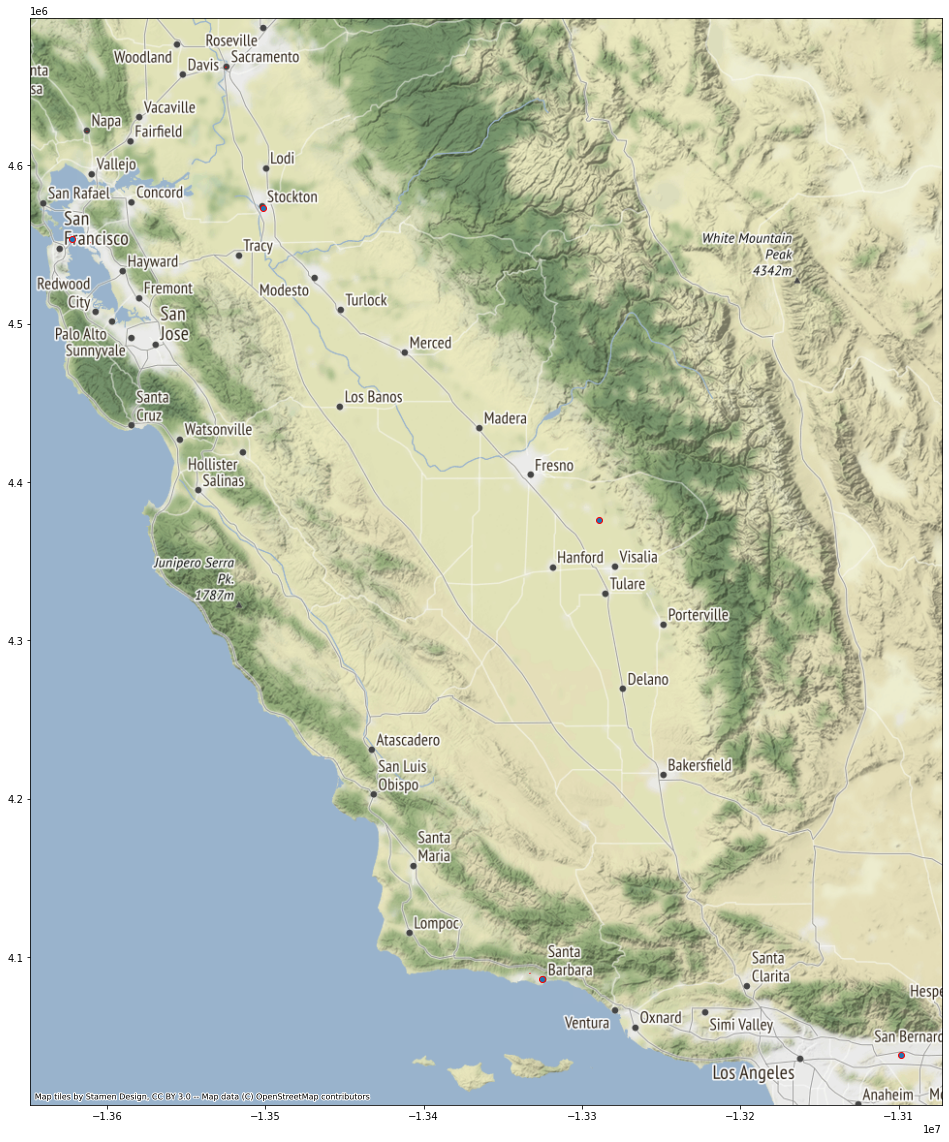

In [75]:
# Plot the city hall in whole CA state
import contextily as ctx
city = city_proj4.to_crs(epsg=3857) # This EPSG-3857 just for ploting
ax = city.plot(figsize=(20, 20), alpha=1, edgecolor='red')
ctx.add_basemap(ax)

In [76]:
eco.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [77]:
# Distance to CBD
eco['min_dist_to_city_hall'] = eco.geometry.apply(min_distance_ppoly, args=(city_proj4,))*0.000621371
output_cbd_distance=eco.loc[:,["ID","min_dist_to_city_hall"]]
output_cbd_distance.columns=["ID","min_dist_to_CBD"]
output_cbd_distance.head()

,ID,min_dist_to_CBD
0,671,5.153850
35064,1127,3.019345
70128,2415,4.642047
105192,2691,76.562372
140256,2692,76.562372


In [78]:
output_cbd_distance['min_dist_to_CBD'].describe()

count    416.000000
mean      44.202220
std       39.160801
min        0.538643
25%        5.603221
50%       34.734360
75%       82.728615
max      202.420563
Name: min_dist_to_CBD, dtype: float64

# Lets extract socio-demographic character of the counters

In [88]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
# Let's take a copy of our layer
bg_proj = bg2.copy()
# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:32610')
bg_proj.head(5)

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,G06000104001001,06,001,400100,1,060014001001,Block Group 1,G5030,S,6894339.0,0.0,+37.8676275,-122.2319460,14302.721555,6.894335e+06,"POLYGON ((569213.145 4190307.545, 569219.152 4..."
1,G06000104002001,06,001,400200,1,060014002001,Block Group 1,G5030,S,288069.0,0.0,+37.8497451,-122.2488478,2971.010308,2.880696e+05,"POLYGON ((566691.985 4189655.115, 566692.422 4..."
2,G06000104002002,06,001,400200,2,060014002002,Block Group 2,G5030,S,298490.0,0.0,+37.8465865,-122.2503095,3162.343955,2.984887e+05,"POLYGON ((566536.504 4189277.038, 566380.004 4..."
3,G06000104003001,06,001,400300,1,060014003001,Block Group 1,G5030,S,265695.0,0.0,+37.8439848,-122.2486668,2553.074982,2.656948e+05,"POLYGON ((566391.132 4188974.609, 566331.701 4..."
4,G06000104003002,06,001,400300,2,060014003002,Block Group 2,G5030,S,269347.0,0.0,+37.8362550,-122.2516875,3534.834596,2.693459e+05,"POLYGON ((565282.301 4188132.871, 565295.127 4..."


# Calculate race

In [ ]:
# ALUCE001:    Total
#        ALUCE002:    White alone
#        ALUCE003:    Black or African American alone

In [91]:
bg_proj["Total block Area"]=bg_proj.area
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','ALUCE001','ALUCE002','ALUCE003','Total block Area']]
buffer_clip_race = gpd.clip(race2, gdf1)
inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
output_pct_race= inter_race.loc[:, ['ID', 'ALUCE001','ALUCE002','ALUCE003','area factor']]
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race=output_pct_race.groupby('ID', as_index=False).sum()
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['ALUCE002']/output_pct_race['ALUCE001'])*100
output_pct_race['pct_African_American']=(output_pct_race['ALUCE003']/output_pct_race['ALUCE001'])*100
output_pct_race1=output_pct_race.drop(['ALUCE001','ALUCE002','ALUCE003'],axis=1)
output_pct_race1.columns=['ID','pct_white','pct_African_American']
output_pct_race1.head()

,ID,pct_white,pct_African_American
0,671,70.549486,1.103223
1,1127,62.632576,2.115437
2,2415,66.399020,9.568666
3,2691,81.059265,5.198135
4,2692,81.059265,5.198135


# Calculate gender

In [93]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
#'ALT0E001:    Total,  ALT0E002:    Male, ALT0E026:    Female
gender_filter=inter_gender.loc[:, ['ID', 'ALT0E001', 'ALT0E002', 'ALT0E026','area factor']]
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
# Aggregate by ID
output_pct_gender=gender_filter.groupby('ID', as_index=False).sum()
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['ALT0E002']/output_pct_gender['ALT0E001'])*100
output_pct_gender['pct_female']=(output_pct_gender['ALT0E026']/output_pct_gender['ALT0E001'])*100
output_pct_gender1=output_pct_gender.drop(['ALT0E001','ALT0E002','ALT0E026'],axis=1)
output_pct_gender1.columns=['ID','pct_male','pct_female']
output_pct_gender1.head()

,ID,pct_male,pct_female
0,671,45.179803,54.820197
1,1127,49.109498,50.890502
2,2415,53.229107,46.770893
3,2691,58.686288,41.313712
4,2692,58.686288,41.313712


# Calculate number of Students

In [96]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
# ALWGE001,=total, ALWGE019:    Some college, less than 1 year
#ALWGE020:    Some college, 1 or more years, no degree
#        ALWGE021:    Associate's degree
#        ALWGE022:    Bachelor's degree
#        ALWGE023:    Master's degree
#        ALWGE024:    Professional school degree
#        ALWGE025:    Doctorate degree

edu_filter=inter_edu.loc[:, ['ID', 'ALWGE001', 'ALWGE019','ALWGE020','ALWGE021', 'ALWGE022','ALWGE023','ALWGE024','ALWGE025','area factor']]
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
# Aggregate by ID
output_pct_edu=edu_filter.groupby('ID', as_index=False).sum()

scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
scl_filter=inter_scl.loc[:, ['ID', 'ALV5E001', 'ALV5E017', 'ALV5E018','area factor']]
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter['total student']=scl_filter['ALV5E017']+scl_filter['ALV5E018']
output_student=scl_filter.loc[:,['ID','total student']]
output_student=output_student.groupby('ID', as_index=False).sum()
output_student.columns=['ID', 'Student Access']
output_student.head()

,ID,Student Access
0,671,348.373809
1,1127,2198.216453
2,2415,1732.835272
3,2691,3650.215115
4,2692,3650.215115


In [97]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['ALWGE001'])*100
output_pct_edu1=output_pct_edu.loc[:,['ID','pct_at_least_college_education']]
output_pct_edu1.columns=['ID','pct_at_least_college_education']
output_pct_edu1.head()

,ID,pct_at_least_college_education
0,671,90.298608
1,1127,82.603467
2,2415,86.089770
3,2691,84.855253
4,2692,84.855253


# Median Age

In [102]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
#    NHGIS code:  AHYR
#        ALT1E001:    Median age: Total
#        ALT1E002:    Median age: Male
#        ALT1E003:    Median age: Female
age_filter=inter_age.loc[:, ['ID','GEOID_x','ALT1E001']]

# Median HH Income

In [105]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
#    Table 1:     Median Household Income in the Past 12 Months (in 2017 Inflation-Adjusted Dollars)
#    Universe:    Households
 #   Source code: B19013
 #   NHGIS code:  ALW1E
 #       ALW1E001:    Median household income in the past 12 months (in 2017 inflation-adjusted dollars
income_filter=inter_income.loc[:, ['ID','GEOID_x', 'ALW1E001','area factor']]
income_filter.head(5)

,ID,GEOID_x,ALW1E001,area factor
0,671,060750401003,111094.0,0.003493
1,5221,060750401003,111094.0,0.969742
2,5223,060750401003,111094.0,1.000000
3,5228,060750401003,111094.0,1.000000
4,22570,060750401003,111094.0,0.239364


# HH Density

In [119]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1['Total Block HH']=hhdensity1.ALU9E001
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
# Aggregate by ID
hh=inter_hhdensity.loc[:,['ID',"GEOID_x","Total Block HH"]]
hhdensity_filter=inter_hhdensity.loc[:, ['ID', 'GEOID_x','ALU9E001','area factor']]
hh_factor=hhdensity_filter.copy()
hh_factor["buffered_hh"]=hh_factor['ALU9E001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['ALU9E001']
hh_factor1=hh_factor.loc[:,["ID","GEOID_x","buffered_hh"]]
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID_x"],axis=1)
output_hhdensity=hhdensity_filter.groupby('ID', as_index=False).sum()
output_hhdensity.columns=['ID', 'Total_HH']
output_hhdensity['HH_density']=output_hhdensity.Total_HH/(3.1416*size*size*3.86102e-7)
output_hhdensity1=output_hhdensity.loc[:, ['ID', 'HH_density']]
output_hhdensity1.head()

,ID,HH_density
0,671,3503.892064
1,1127,26537.520612
2,2415,17752.654098
3,2691,3235.253308
4,2692,3235.253308


## Weighted HH_income

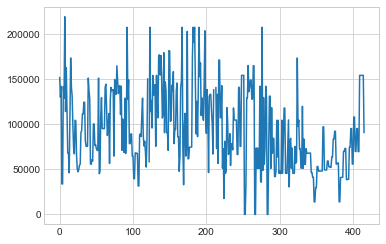

In [122]:
whh_income=pd.merge(income_filter, hh_factor1, on=['ID', 'GEOID_x'])
whh_income['wt_incme']=whh_income['ALW1E001'].mul(whh_income['buffered_hh'])
income_filter=whh_income.drop(['GEOID_x','ALW1E001','area factor'],axis=1)
# Aggregate by ID
income_filter=income_filter.groupby('ID', as_index=False).sum()
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['ID', 'Median_HH_income']
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.plot(output_income.Median_HH_income)

# Population Density

In [127]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
#    Table 1:     Total Population
#    Universe:    Total population
#    Source code: B01003
#    NHGIS code:  AHY1
#       AHY1E001:    Total
 
pdensity_filter=inter_pdensity.loc[:, ['ID', 'AMPVE001','area factor']]
age_pop=inter_pdensity.loc[:, ['ID', 'GEOID_x','AMPVE001','area factor']]
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
pp=inter_pdensity.loc[:, ['ID','GEOID_x', 'AMPVE001','area factor']]
pp.columns=['ID','GEOID', 'AMPVE001','pp factor']
pp1=pp.loc[:,["ID",'GEOID',"pp factor"]]
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('ID', as_index=False).sum()
output_pdensity['population_density']=output_pdensity.AMPVE001/(3.1416*size*size*3.86102e-7)
output_pdensity1=output_pdensity.loc[:, ['ID', 'population_density']]
output_pdensity1.columns=['ID', 'population_density']
output_pdensity1.head()

,ID,population_density
0,671,7519.105739
1,1127,20802.530110
2,2415,29059.732564
3,2691,7407.807740
4,2692,7407.807740


# Weighted Median Age

In [132]:
w_age=pd.merge(age_pop,age_filter,on=["ID","GEOID_x"])
w_age['w_age']=(w_age['AMPVE001'].mul(w_age['ALT1E001'],axis=0))
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID_x','ALT1E001','area factor'],axis=1)
# Aggregate by ID
output_median_age=age_filter1.groupby('ID', as_index=False).sum()
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['AMPVE001']
output_median_age=output_median_age.drop(['AMPVE001','w_age'],axis=1)
output_median_age.columns=["ID","Median Age"]
output_median_age.head()

,ID,Median Age
0,671,38.966406
1,1127,38.239858
2,2415,34.641712
3,2691,23.961926
4,2692,23.961926


# Employment Density

In [136]:
edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
#    Table 1:     Employment Status for the Population 16 Years and Over
#    Universe:    Population 16 years and over
#    Source code: B23025
#    NHGIS code:  AH3P
#        AH3PE001:    Total
#        AH3PE002:    In labor force
#        AH3PE003:    In labor force: Civilian labor force
#        AH3PE004:    In labor force: Civilian labor force: Employed
#        AH3PE005:    In labor force: Civilian labor force: Unemployed
#        AH3PE006:    In labor force: Armed Forces
#        AH3PE007:    Not in labor force
 # columns to keep
filtered_columns=['ID','AMT9E001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
# Aggregate by ID
output_edensity=edensity_filter.groupby('ID', as_index=False).sum()
output_edensity['employment_density']=output_edensity.AMT9E001/(3.1416*size*size*3.86102e-7)
output_edensity1=output_edensity.loc[:, ['ID', 'employment_density']]
output_edensity1.columns=['ID', 'employment_density']
output_edensity1.head()

,ID,employment_density
0,671,6219.810255
1,1127,19609.011285
2,2415,26625.663509
3,2691,7014.619758
4,2692,7014.619758


# percentage of bike commute

In [138]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
# Table 1:     Means of Transportation to Work
#     Universe:    Workers 16 years and over
#     Source code: B08301
#     NHGIS code:  AMQK
#         AMQKE001:    Total
#         AMQKE002:    Car, truck, or van
#         AMQKE003:    Car, truck, or van: Drove alone
#         AMQKE004:    Car, truck, or van: Carpooled
#         AMQKE005:    Car, truck, or van: Carpooled: In 2-person carpool
#         AMQKE006:    Car, truck, or van: Carpooled: In 3-person carpool
#         AMQKE007:    Car, truck, or van: Carpooled: In 4-person carpool
#         AMQKE008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#         AMQKE009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
#         AMQKE010:    Public transportation (excluding taxicab)
#         AMQKE011:    Public transportation (excluding taxicab): Bus
#         AMQKE012:    Public transportation (excluding taxicab): Subway or elevated rail
#         AMQKE013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#         AMQKE014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro publico in Puerto Rico)
#         AMQKE015:    Public transportation (excluding taxicab): Ferryboat
#         AMQKE016:    Taxicab
#         AMQKE017:    Motorcycle
#         AMQKE018:    Bicycle
#         AMQKE019:    Walked
#         AMQKE020:    Other means
#         AMQKE021:    Worked from home
# columns to keep
filtered_columns=['ID','AMQKE001','AMQKE018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('ID', as_index=False).sum()
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['AMQKE018']/output_bikecom['AMQKE001'])*100
output_bikecom['bike commuter density']=output_bikecom['AMQKE018']/(3.1416*size*size*3.861e-7)
output_bikecom.columns=["ID","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

,ID,Total Commuter,Bike Commuter,Percentage of Bike Commuter,bike commuter density
0,671,3127.241241,159.824309,5.110713,203.495292
1,1127,11234.019436,197.352495,1.756740,251.277818
2,2415,16134.096210,1351.356394,8.375780,1720.605996
3,2691,3148.238608,400.995099,12.737125,510.564478
4,2692,3148.238608,400.995099,12.737125,510.564478


# Aggregate all the extracted data together

In [139]:
gdf2=gdf1[['ID','latitude','longitude','geometry']]
gdf3=gpd.GeoDataFrame(gdf2, geometry='geometry', crs={'init': 'epsg:32610'})
gdf3.head()

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ID,latitude,longitude,geometry
0,671,37.791160,-122.459440,"POLYGON ((548398.847 4182781.782, 548394.972 4..."
35064,1127,37.796165,-122.419490,"POLYGON ((551912.868 4183358.173, 551908.993 4..."
70128,2415,37.774200,-122.436295,"POLYGON ((550448.031 4180912.115, 550444.157 4..."
105192,2691,35.287736,-120.657826,"POLYGON ((713800.948 3907468.448, 713797.074 3..."
140256,2692,35.287736,-120.657826,"POLYGON ((713800.948 3907468.448, 713797.074 3..."


In [140]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [gdf3,output_cbd_distance,output_commercial,commercialcc_distance,output_retail,retailcc_distance,output_industrial,industrialcc_distance,
          output_residential,residentialcc_distance,output_grass,grasscc_distance,output_forest,forestcc_distance,output_education,
         educationcc_distance,output_institutional,institutionalcc_distance,output_water,watercc_distance,output_park,parkcc_distance,
         output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_pct_race1, 
          output_pct_gender1, output_student, output_pct_edu1, output_hhdensity1, output_income, output_pdensity1, output_median_age, output_edensity1, 
          output_bikecom ]

In [141]:
#Merge by ID
df_merged_eco = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                            how='left'), df_all).fillna('0')
df_merged_eco1=df_merged_eco.drop_duplicates(subset=['ID'],keep='first')
df_merged_eco1.head()

,ID,latitude,longitude,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,...,pct_at_least_college_education,HH_density,Median_HH_income,population_density,Median Age,employment_density,Total Commuter,Bike Commuter,Percentage of Bike Commuter,bike commuter density
0,671,37.791160,-122.459440,"POLYGON ((548398.847 4182781.782, 548394.972 4...",5.153850,0,0.797617,0.036196,0.527663,0,...,90.298608,3503.892064,152302.540234,7519.105739,38.966406,6219.810255,3127.241241,159.824309,5.110713,203.495292
1,1127,37.796165,-122.419490,"POLYGON ((551912.868 4183358.173, 551908.993 4...",3.019345,0.002189,0.249510,0.165813,0.131352,0,...,82.603467,26537.520612,130355.303644,20802.530110,38.239858,19609.011285,11234.019436,197.352495,1.75674,251.277818
2,2415,37.774200,-122.436295,"POLYGON ((550448.031 4180912.115, 550444.157 4...",4.642047,0,0.687274,0.087677,0.155897,0,...,86.08977,17752.654098,142485.803584,29059.732564,34.641712,26625.663509,16134.096210,1351.356394,8.37578,1720.605996
3,2691,35.287736,-120.657826,"POLYGON ((713800.948 3907468.448, 713797.074 3...",76.562372,0.00859,0.397234,0.009334,0.254896,0,...,84.855253,3235.253308,33837.507206,7407.807740,23.961926,7014.619758,3148.238608,400.995099,12.737125,510.564478
4,2692,35.287736,-120.657826,"POLYGON ((713800.948 3907468.448, 713797.074 3...",76.562372,0.00859,0.397234,0.009334,0.254896,0,...,84.855253,3235.253308,33837.507206,7407.807740,23.961926,7014.619758,3148.238608,400.995099,12.737125,510.564478


In [142]:
df_merged_eco2=gpd.GeoDataFrame(df_merged_eco1, geometry='geometry', crs='EPSG:32610') 
df_merged_eco3=df_merged_eco2.to_crs(epsg=4326)

In [143]:
df_merged_eco3.shape

(416, 46)

In [144]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco3, 'Eco_CA_Bike_data_circular_0.5_mile_buffer.csv', sep=',', na_rep='0', index=False)

# End of the Program